# 📊 Employee Attrition Analysis & Prediction

## 📌 Project Overview
This project aims to analyze and predict **employee attrition** using machine learning techniques. We explore key factors influencing employee turnover and build a classification model to predict whether an employee is likely to leave the organization.

## Dataset
The dataset used in this project is the **IBM HR Analytics Employee Attrition Dataset**, which contains various employee-related attributes such as **age, job role, salary, work-life balance, and job satisfaction**.

## Objectives
- Perform **Exploratory Data Analysis (EDA)** to identify key trends and patterns.
- Build a **classification model** to predict employee attrition.
- Analyze **feature importance** to understand what factors contribute most to employee turnover.
- Provide **business insights** to help organizations retain valuable employees.

## 📊 Data Analysis & Insights
✔️ **Visualized attrition distribution** among employees.  
✔️ Identified key factors like **monthly income, job satisfaction, and work-life balance** that influence attrition.  
✔️ Analyzed trends using **boxplots** and **correlation heatmaps**.  

## Model Used
We trained an **XGBoost Classifier**, a powerful **gradient-boosting algorithm**, achieving **high accuracy** in predicting employee attrition. The **confusion matrix** and **classification report** were used to evaluate model performance.

## Key Findings
✅ **Employees with lower salaries are more likely to leave.**  
✅ **Low job satisfaction is a major reason for employee attrition.**  
✅ **Work-life balance plays a crucial role in retention.**  


## Conclusion
This project provides valuable insights into **employee attrition** and helps organizations take **data-driven actions** to reduce turnover rates. 📉



#### -----------------------------------------------------------------------


# Employee Attrition Analysis

## 1. Importing libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load data
data_path = '/kaggle/input/employee-attrition/HR-Employee-Attrition.csv'
df = pd.read_csv(data_path)

## 2. Data Overview

In [3]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. Missing Values Check

In [5]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 4. Employee Attrition Distribution

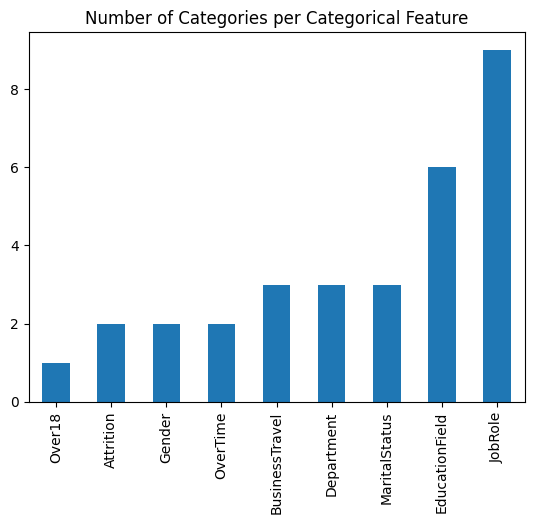

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols].nunique().sort_values().plot(kind='bar', title='Number of Categories per Categorical Feature')
plt.show()

## 5. Visualizing attrition distribution

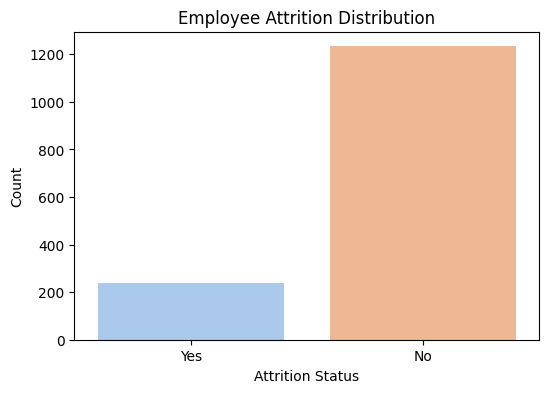

This plot shows the distribution of employees who left versus those who stayed.


In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='pastel')
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition Status')
plt.ylabel('Count')
plt.show()
print("This plot shows the distribution of employees who left versus those who stayed.")

## 6. Encoding Target Variable

In [8]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

## 7. Dropping Irrelevant Columns

In [9]:
df.drop(columns=['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], inplace=True)

## 8. Encoding Categorical Features

In [10]:
df = pd.get_dummies(df, drop_first=True)

## 9. Splitting Data for Training & Testing

In [11]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 10. Normalization

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 11. Model Training Using XGBoost

In [13]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [14]:
# Make predictions
y_pred = model.predict(X_test)

## 12. Model Evaluation

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       247
           1       0.57      0.26      0.35        47

    accuracy                           0.85       294
   macro avg       0.72      0.61      0.63       294
weighted avg       0.82      0.85      0.83       294



## 13. Confusion Matrix

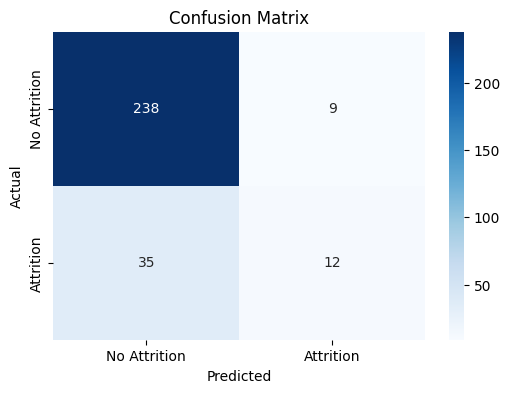

The confusion matrix provides insights into the model's accuracy, showing true positives, true negatives, false positives, and false negatives.


In [16]:
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("The confusion matrix provides insights into the model's accuracy, showing true positives, true negatives, false positives, and false negatives.")

## 14. Feature Importance Analysis

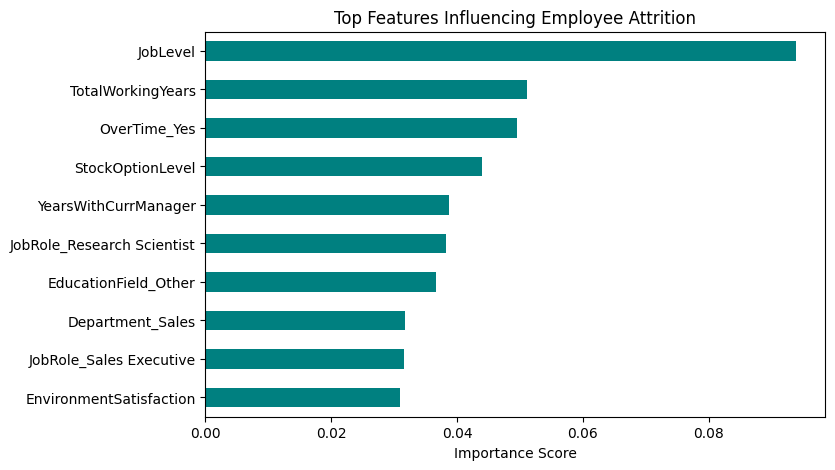

This bar chart highlights the most influential features affecting employee attrition.


In [17]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
plt.figure(figsize=(8, 5))
feature_importances.sort_values().plot(kind='barh', title='Top Features Influencing Employee Attrition', color='teal')
plt.xlabel('Importance Score')
plt.show()
print("This bar chart highlights the most influential features affecting employee attrition.")

## 15. Deeper Analysis of Attrition Factors

### Monthly Income vs Attrition

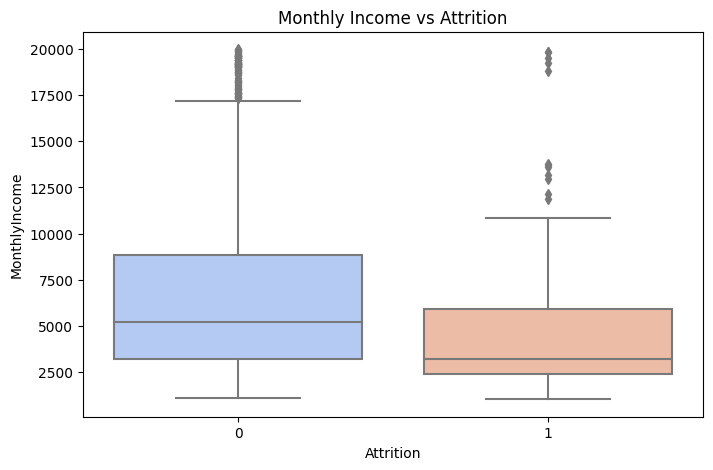

This boxplot indicates whether income levels impact employee attrition. Lower salaries may be correlated with higher attrition rates.


In [18]:
# Deeper Analysis: Understanding Attrition Factors
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title('Monthly Income vs Attrition')
plt.show()
print("This boxplot indicates whether income levels impact employee attrition. Lower salaries may be correlated with higher attrition rates.")

### Job Satisfaction vs Attrition

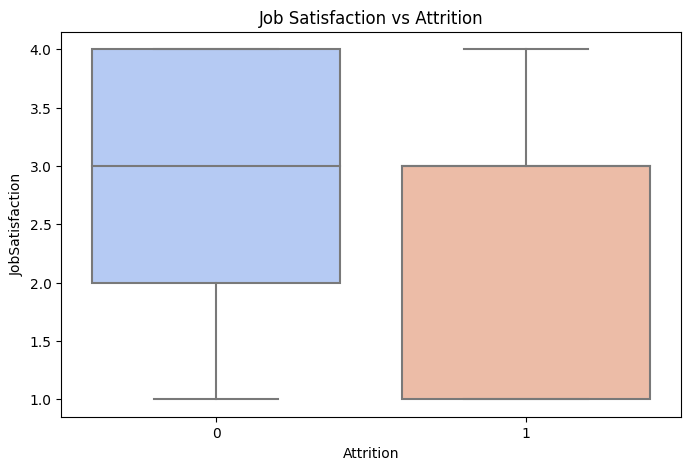

This plot helps determine whether lower job satisfaction leads to higher attrition rates.


In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='coolwarm')
plt.title('Job Satisfaction vs Attrition')
plt.show()
print("This plot helps determine whether lower job satisfaction leads to higher attrition rates.")